# Product Sales Analysis

In [204]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [205]:
#importing the dataset and displaying the top 5 rows
data = pd.read_excel("sales sample data.xlsx")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [206]:
# showing the decriptive statistics of the data
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [207]:
#Setting order number as Index
data = data.set_index('ORDERNUMBER')
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [208]:
#checking for missing values
data.isnull().sum()

QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [209]:
#checking for the data type of each column
data.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [210]:
# cahnge data type of order date to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data.dtypes

QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [211]:
#shape of the dataset
data.shape

(2823, 24)

In [212]:
#displaying summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   STATUS            2823 non-null   object        
 6   QTR_ID            2823 non-null   int64         
 7   MONTH_ID          2823 non-null   int64         
 8   YEAR_ID           2823 non-null   int64         
 9   PRODUCTLINE       2823 non-null   object        
 10  MSRP              2823 non-null   int64         
 11  PRODUCTCODE       2823 non-null   object        
 12  CUSTOMERNAME      2823 non-null   object        
 13  PHONE             2823 non-null   object        
 14  ADDRESSLINE1      2

### MONTHLY SALES TREND

In [213]:
#Creating a new column month_year from orderdate column
data['MONTH_YEAR'] = data['ORDERDATE'].apply(lambda x: x.strftime('%Y-%m'))
data['MONTH_YEAR']

ORDERNUMBER
10107    2003-02
10121    2003-07
10134    2003-01
10145    2003-08
10159    2003-10
          ...   
10350    2004-02
10373    2005-01
10386    2005-01
10397    2005-03
10414    2005-06
Name: MONTH_YEAR, Length: 2823, dtype: object

In [214]:
data_trend = data.groupby('MONTH_YEAR').sum()['SALES'].reset_index()
data_trend

,MONTH_YEAR,SALES
0,2003-01,228402.12
1,2003-02,255820.01
2,2003-03,239553.11
3,2003-04,262919.85
4,2003-05,322093.48
5,2003-06,262714.93
6,2003-07,123712.40
7,2003-08,216856.04
8,2003-09,215252.17
9,2003-10,487145.52


In [215]:
#importing the data visualisation library
import matplotlib.pyplot as plt
%matplotlib inline

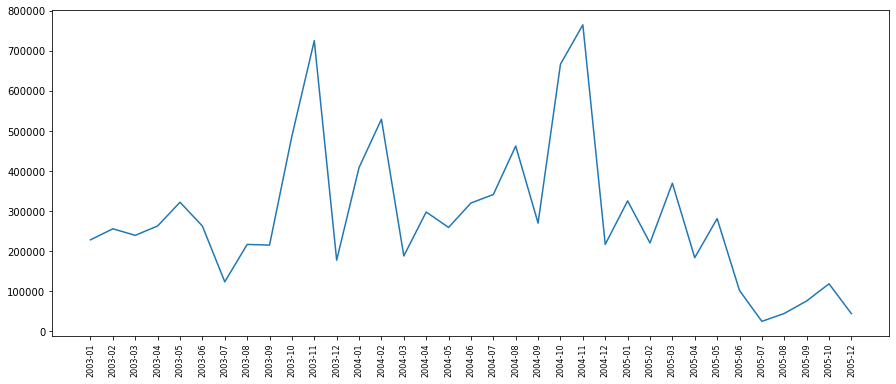

In [216]:
#plotting the trend graph
plt.figure(figsize=(15,6))
plt.plot(data_trend['MONTH_YEAR'], data_trend['SALES'])
plt.xticks(rotation='vertical',size=8)
plt.show()

### SALES BY MONTHS OF THE YEAR

In [217]:
Sales_Month = pd.DataFrame(data.groupby('MONTH_ID')['SALES'].sum())
Sales_Month

,SALES
MONTH_ID,
1,785874.44
2,810441.90
3,754501.39
4,669390.96
5,923972.56
6,454756.78
7,514875.97
8,659310.57
9,584724.27


### TOP 5 PRODUCTS BY SALES

In [218]:
Product_sales =data.groupby('PRODUCTLINE').sum()['SALES']
Product_sales

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

In [219]:
Product_sales = pd.DataFrame(data.groupby('PRODUCTLINE').sum()['SALES'])
Product_sales

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Motorcycles,1166388.34
Planes,975003.57
Ships,714437.13
Trains,226243.47
Trucks and Buses,1127789.84
Vintage Cars,1903150.84


In [220]:
#Sorting in descending order
Product_sales = Product_sales.sort_values('SALES',ascending=False)
Product_sales

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57
Ships,714437.13
Trains,226243.47


In [221]:
#Top 5 Products by Sales
Product_sales[:5]

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57


### TOP 5 MOST SELLING PRODUCTS

In [222]:
Top_product =data.groupby('PRODUCTLINE').sum()['QUANTITYORDERED']
Top_product

PRODUCTLINE
Classic Cars        33992
Motorcycles         11663
Planes              10727
Ships                8127
Trains               2712
Trucks and Buses    10777
Vintage Cars        21069
Name: QUANTITYORDERED, dtype: int64

In [223]:
Top_product = pd.DataFrame(data.groupby('PRODUCTLINE').sum()['QUANTITYORDERED'])
Top_product

,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,33992
Motorcycles,11663
Planes,10727
Ships,8127
Trains,2712
Trucks and Buses,10777
Vintage Cars,21069


In [224]:
#Sorting in descending order
Top_product = Top_product.sort_values('QUANTITYORDERED',ascending=False)
Top_product

,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,33992
Vintage Cars,21069
Motorcycles,11663
Trucks and Buses,10777
Planes,10727
Ships,8127
Trains,2712


In [225]:
#Top 5 most selling products
Top_product[:5]

,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,33992
Vintage Cars,21069
Motorcycles,11663
Trucks and Buses,10777
Planes,10727


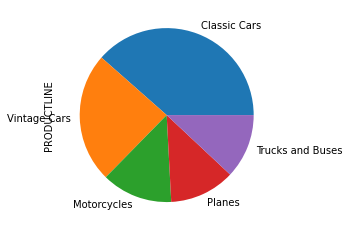

In [226]:
data['PRODUCTLINE'].value_counts()[0:5].plot(kind='pie')
plt.show()

### AVERAGE PRICE OF PRODUCTS

In [227]:
Average_price = pd.DataFrame(data.groupby('PRODUCTLINE')['PRICEEACH'].mean())
Average_price

,PRICEEACH
PRODUCTLINE,
Classic Cars,87.335781
Motorcycles,82.997553
Planes,81.740915
Ships,83.855470
Trains,75.654675
Trucks and Buses,87.527940
Vintage Cars,78.148204


### DISPLAYING ORDERED QUANTITY AND AVERAGE PRICE OF EACH PRODUCT

In [228]:
data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().index
quantity=data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
prices=data.groupby('PRODUCTLINE')['PRICEEACH'].mean()

<ipython-input-229-62b1d1978f77>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, 'Classic Cars'),
 Text(1, 0, 'Motorcycles'),
 Text(2, 0, 'Planes'),
 Text(3, 0, 'Ships'),
 Text(4, 0, 'Trains'),
 Text(5, 0, 'Trucks and Buses'),
 Text(6, 0, 'Vintage Cars')]

<Figure size 2880x1728 with 0 Axes>

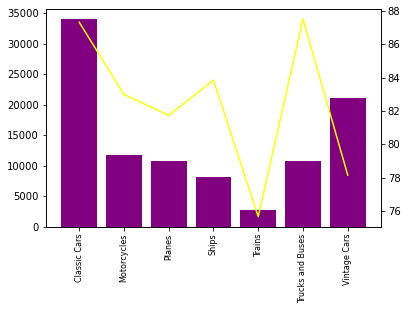

In [229]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='purple')
ax2.plot(products, prices, 'yellow')
ax1.set_xticklabels(products, rotation='vertical', size=8)

### MOST FREQUENT DEAL SIZE

C:\Users\Blessing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


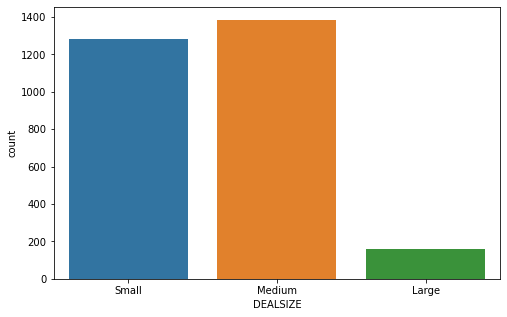

In [230]:
plt.figure(figsize=(8,5))

sns.countplot(data['DEALSIZE'])
plt.show()